# Tarea - Ajuste de curvas

---
Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [6]:
pip instal quandl
import quandl

data = quandl.get("EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A",
                authtoken="qoEdK2vzPsx-8ADhs71o")

SyntaxError: invalid syntax (<ipython-input-6-b44320186a77>, line 1)

1. Ajuste estos datos a polinomios de grado 1 hasta 3.

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

---
El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

# 1- Años contra población:

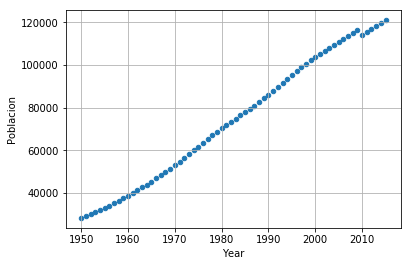

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np
%matplotlib inline

file=r'population_data.csv'
datos=pd.read_csv(file,header=0)
dataframe=pd.DataFrame(datos,columns=['Year','Poblacion','Nacimientos','Decesos'])

dataframe.plot(x='Year',y='Poblacion',kind='scatter')
plt.grid()

In [108]:
x=dataframe['Year']
y=dataframe['Poblacion']
def obj(beta,x,y,n):
    f=beta@[x**i for i in range(n+1)]
    return np.sum((y-f)**2)

# ajuste lineal
beta1=[0,1]
r1=opt.minimize(obj,beta1,args=(x,y,1))

#ajuste cuadrático
beta2=[0,1,1]
r2=opt.minimize(obj,beta2,args=(x,y,2))

#ajuste cúbico
beta3=[1,1,1,1]
r3=opt.minimize(obj,beta3,args=(x,y,3))



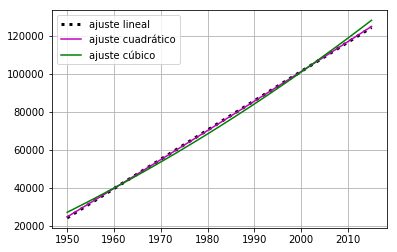

In [112]:
def f(beta,x,n):
    return beta@[x**i for i in range(n+1)]
plt.plot(x,f(r1.x,x,1),'k:',lw=3,label='ajuste lineal')
plt.plot(x,f(r2.x,x,2),'m',label='ajuste cuadrático')
plt.plot(x,f(r3.x,x,3),'g',label='ajuste cúbico')
plt.legend(loc='best')
plt.grid()


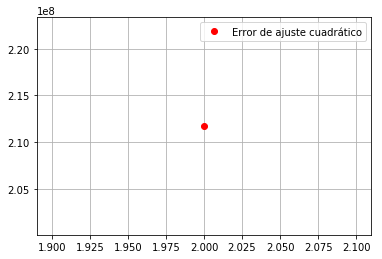

In [115]:
#Error cuadrático
plt.plot(2,r2.fun,'or',label='Error de ajuste cuadrático')
plt.legend(loc='best')
plt.grid()

# Años contra nacimientos:

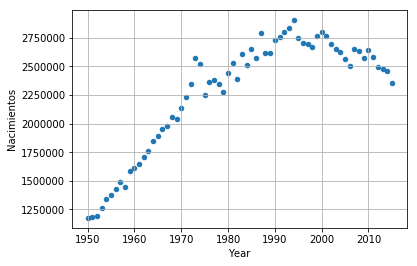

In [129]:
#Gráfica de datos de dispersión
dataframe.plot(x='Year',y='Nacimientos',kind='scatter')
plt.grid()

In [130]:
#Ajustes:
x=dataframe['Year']
y=dataframe['Nacimientos']

beta1=[0,1]
r1=opt.minimize(obj,beta1,args=(x,y,1))

#ajuste cuadrático
beta2=[0,1,1]
r2=opt.minimize(obj,beta2,args=(x,y,2))

#ajuste cúbico
beta3=[1,1,1,1]
r3=opt.minimize(obj,beta3,args=(x,y,3))

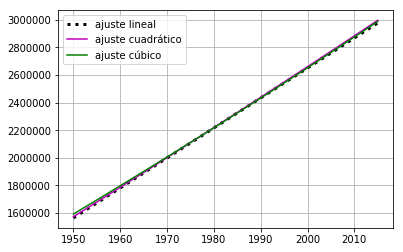

In [131]:
#Gráfica de ajustes:
def f(beta,x,n):
    return beta@[x**i for i in range(n+1)]
plt.plot(x,f(r1.x,x,1),'k:',lw=3,label='ajuste lineal')
plt.plot(x,f(r2.x,x,2),'m',label='ajuste cuadrático')
plt.plot(x,f(r3.x,x,3),'g',label='ajuste cúbico')
plt.legend(loc='best')
plt.grid()